In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 1.1092 - mean_squared_error: 1.1092 - val_loss: 0.9164 - val_mean_squared_error: 0.9164
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0157 - mean_squared_error: 1.0157 - val_loss: 0.8268 - val_mean_squared_error: 0.8268
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9284 - mean_squared_error: 0.9284 - val_loss: 0.7697 - val_mean_squared_error: 0.7697
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9111 - mean_squared_error: 0.9111 - val_loss: 0.7327 - val_mean_squared_error: 0.7327
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9049 - mean_squared_error: 0.9049 - val_loss: 0.7040 - val_mean_squared_error: 0.7040
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7953 - mean_squared_error: 0.7953 - val_loss: 0.6704 - val_mean_squared_error: 0.6704
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7868 - mean_squared_error: 0.7868 - val_loss: 0.6477 - v

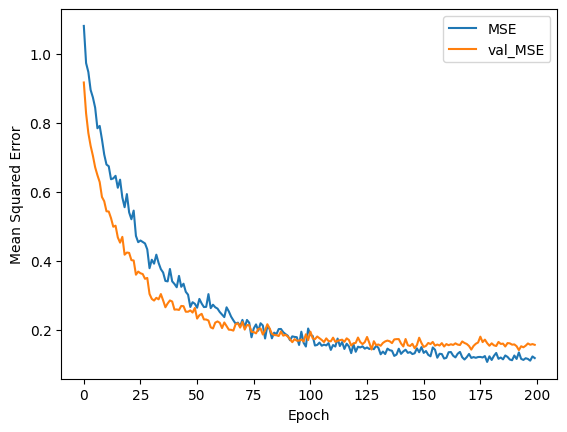

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

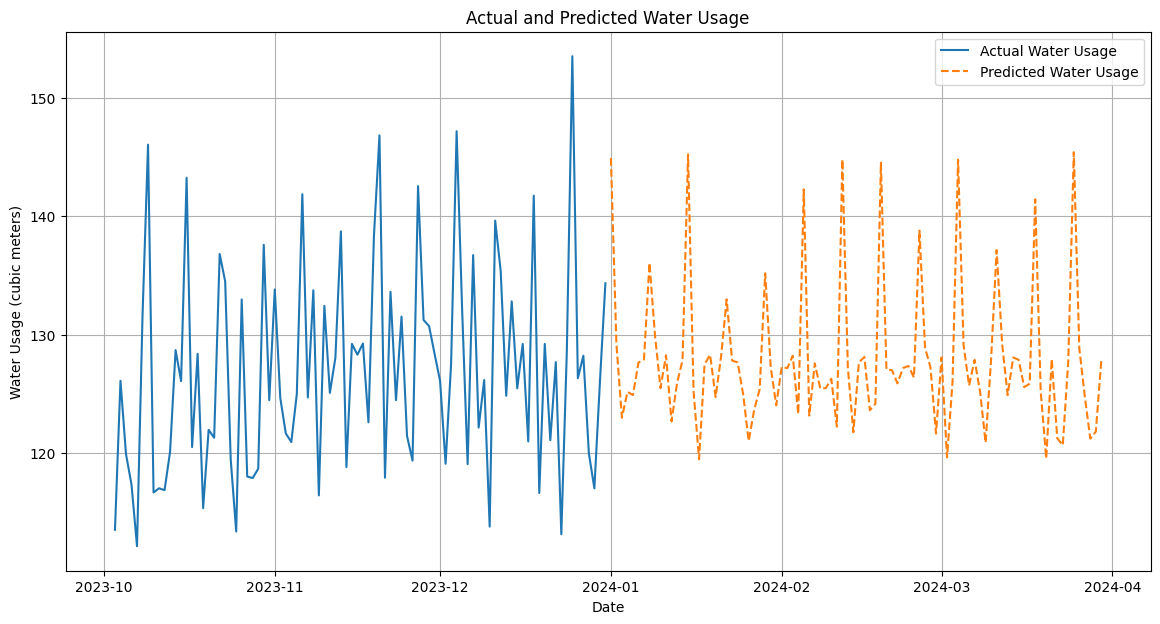

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the CSV file from Google Drive
df_synthetic = pd.read_csv('/content/drive/My Drive/synthetic_water_usage_data.csv')

# Convert 'Date' to datetime object
df_synthetic['Date'] = pd.to_datetime(df_synthetic['Date'])

# Set 'Date' as the index
df_synthetic.set_index('Date', inplace=True)

# Feature selection with additional features
features = ['Date_ordinal', 'DayOfWeek', 'Month', 'ProductionLevel', 'Employees', 'Temperature']
X = df_synthetic[features]
y = df_synthetic['WaterUsage']

# Scale numerical features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred_scaled = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_scaled)
mae = mean_absolute_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

# Plot training history
plt.plot(history.history['mean_squared_error'], label='MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(loc='upper right')
plt.show()

# Generate future dates for the next 3 months
future_dates = pd.date_range(start='2024-01-01', periods=90, freq='D')

# Create an array to store future predictions
future_predictions = []

# Get the last known data to start predictions
last_known_data = df_synthetic.iloc[-1]

# Predict water usage for the next 3 months
for date in future_dates:
    day_of_week = date.weekday()
    month = date.month
    date_ordinal = date.toordinal()

    # Identify the same period last year
    previous_year_date = date - timedelta(days=365)

    if previous_year_date in df_synthetic.index:
        last_year_data = df_synthetic.loc[previous_year_date]
        new_features = pd.DataFrame([{
            'Date_ordinal': date_ordinal,
            'DayOfWeek': day_of_week,
            'Month': month,
            'ProductionLevel': last_year_data['ProductionLevel'],
            'Employees': last_year_data['Employees'],
            'Temperature': last_year_data['Temperature']
        }])
    else:
        # Fallback to use the last known data if last year's data is not available
        new_features = pd.DataFrame([{
            'Date_ordinal': date_ordinal,
            'DayOfWeek': day_of_week,
            'Month': month,
            'ProductionLevel': last_known_data['ProductionLevel'],
            'Employees': last_known_data['Employees'],
            'Temperature': last_known_data['Temperature']
        }])

    new_features_scaled = scaler_X.transform(new_features)

    # Make the prediction
    next_prediction_scaled = model.predict(new_features_scaled)
    next_prediction = scaler_y.inverse_transform(next_prediction_scaled)

    # Store the prediction
    future_predictions.append(next_prediction[0, 0])

    # Update last_known_data with the predicted value
    last_known_data = pd.Series({
        'Date_ordinal': date_ordinal,
        'DayOfWeek': day_of_week,
        'Month': month,
        'ProductionLevel': last_year_data['ProductionLevel'],
        'Employees': last_year_data['Employees'],
        'Temperature': last_year_data['Temperature'],
        'WaterUsage': next_prediction[0, 0]
    })

# Create a DataFrame for future predictions
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['PredictedWaterUsage'])

# Plot the actual and predicted water usage
plt.figure(figsize=(14, 7))
plt.plot(df_synthetic.index[-90:], df_synthetic['WaterUsage'][-90:], label='Actual Water Usage')
plt.plot(future_df.index, future_df['PredictedWaterUsage'], label='Predicted Water Usage', linestyle='--')
plt.title('Actual and Predicted Water Usage')
plt.xlabel('Date')
plt.ylabel('Water Usage (cubic meters)')
plt.legend()
plt.grid(True)
plt.show()


**Mean Squared Error (MSE):**

Value: 0.10839873393184624
Interpretation: MSE measures the average of the squares of the errors, that is, the average squared difference between the actual values and the predicted values. Lower values of MSE indicate better model performance, as it means the predictions are closer to the actual values. An MSE of 0.108 suggests that on average, the square of the prediction errors is 0.108. This value is not in the same unit as the target variable (water usage) but in its square.

**Mean Absolute Error (MAE):**

Value: 0.2614451551310277
Interpretation: MAE measures the average absolute difference between the actual values and the predicted values. It is a direct measure of the average magnitude of errors in a set of predictions, without considering their direction. An MAE of 0.261 means that on average, the predictions are off by 0.261 units of water usage. This metric is in the same unit as the target variable, making it easier to interpret.

**R² Score (Coefficient of Determination):**

Value: 0.8693020987232738
Interpretation: R² score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It is a statistic that gives some information about the goodness of fit of a model. An R² score of 0.869 indicates that approximately 86.93% of the variance in the water usage can be explained by the model. The closer the R² score is to 1, the better the model explains the variance in the data. A score of 0.869 is quite high, suggesting that the model has a good fit.
Summary
MSE of 0.108: On average, the squared errors of the predictions are 0.108, which is a relatively low error.
MAE of 0.261: On average, the predictions deviate from the actual values by 0.261 units of water usage.
R² Score of 0.869: Approximately 86.93% of the variance in the water usage data is explained by the model, indicating a strong fit.

These metrics collectively suggest that the model performs well, with low error rates and a high proportion of explained variance.

In [ ]:
!pip install flask plotly pandas dash dash-bootstrap-components pyngrok



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 16.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html
import dash_bootstrap_components as dbc
from pyngrok import ngrok



In [ ]:

# Load the CSV file from Google Drive
df_synthetic = pd.read_csv('/content/drive/My Drive/synthetic_water_usage_data.csv')

# Convert 'Date' to datetime object
df_synthetic['Date'] = pd.to_datetime(df_synthetic['Date'])
df_synthetic.set_index('Date', inplace=True)

# Prepare historical and predicted data
historical_data = df_synthetic[-90:]
# Generate future dates for the next 3 months
future_dates = pd.date_range(start='2024-01-01', periods=90, freq='D')
# Monthly aggregated data
monthly_data = df_synthetic['WaterUsage'].resample('M').sum()
last_3_months_data = monthly_data[-4:]



In [17]:
from dash import Dash, html, dcc, Input, Output, State, callback_context
import dash_bootstrap_components as dbc
import plotly.graph_objs as go
import pandas as pd
from pyngrok import ngrok
# Create Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

def create_card(month, value, previous_value, index):
    color = "#d4edda" if value <= previous_value else "#f8d7da"  # Light green for decrease, light red for increase
    arrow = "↑" if value > previous_value else "↓"  # Up arrow for increase, down arrow for decrease
    return dbc.Card(
        [
            dbc.CardHeader(f"{month.strftime('%B %Y')}"),
            dbc.CardBody(
                [
                    html.H4(f"{value:.2f} {arrow}", className="card-title"),
                    html.P("Water Usage", className="card-text"),
                ],
                style={'textAlign': 'center'}
            ),
        ],
        style={"backgroundColor": color, "border": "none"},
    )

# Ngrok authentication
ngrok.set_auth_token('2k02YLrrWWo7GDdvyRZ7Lsoh7F2_4G9vuA7jXvh54PTMmGS6R')

# Create a tunnel using ngrok (make sure no other tunnels are running)
ngrok.kill()  # This will kill any existing tunnels
public_url = ngrok.connect(8050)
print(f"Dash app running at {public_url}")

# Check if we have enough data
cards = []
if len(last_3_months_data) >= 3:
    for i in range(len(last_3_months_data) - 1):
        previous_value = last_3_months_data.iloc[-(i+2)]
        cards.append(dbc.Col(create_card(last_3_months_data.index[-(i+1)], last_3_months_data.iloc[-(i+1)], previous_value, i)))
else:
    cards.append(html.P("Not enough data to display cards."))

app.layout = html.Div([
    dcc.Graph(id='water-usage-plot', figure={
        'data': [
            go.Scatter(x=historical_data.index, y=historical_data['WaterUsage'], mode='lines', name='Actual Water Usage'),
            go.Scatter(x=future_df.index, y=future_df['PredictedWaterUsage'], mode='lines', name='Predicted Water Usage', line=dict(dash='dash'))
        ],
        'layout': go.Layout(title='Actual and Predicted Water Usage', xaxis={'title': 'Date'}, yaxis={'title': 'Water Usage (cubic meters)'})
    }),
    dbc.Row(cards)
])

# Run the app
app.run_server(port=8050)

Dash app running at NgrokTunnel: "https://8800-34-139-120-233.ngrok-free.app" -> "http://localhost:8050"


<IPython.core.display.Javascript object>